In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv("dirty_diabetes_data.csv")

In [28]:
df.head()

,gender,blood_type,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,Male,A,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,Male,A,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,Female,B,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,Male,A,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,Male,AB,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       760 non-null    object 
 1   blood_type   747 non-null    object 
 2   pregnancies  768 non-null    int64  
 3   glucose      766 non-null    float64
 4   diastolic    766 non-null    float64
 5   triceps      767 non-null    float64
 6   insulin      767 non-null    float64
 7   bmi          768 non-null    float64
 8   dpf          767 non-null    float64
 9   age          766 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 60.1+ KB


<h1>Fixing the Inconsistency in #Gender column and fill the null values: 


In [30]:
df.gender.unique()

array(['Male', 'Female', 'Make', 'female', nan, 'Femali', 'Mile', 'mal',
       'Femal'], dtype=object)

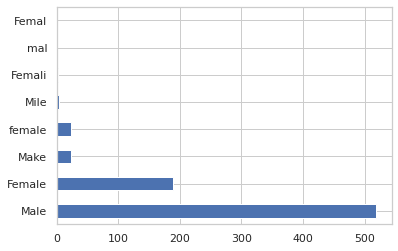

In [31]:
df.gender.value_counts().plot(kind="barh")

In [32]:
df['gender']=df['gender'].replace({"Make":"Male","Mile":"Male","mal":"Male",
                                   "female":"Female","Femali":"Female","Femal":"Female"})

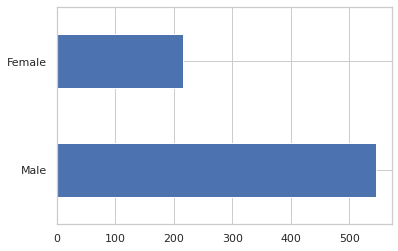

In [33]:
df.gender.value_counts().plot(kind="barh")

In [34]:
print("Number of null values in gender is: ",df['gender'].isnull().sum())
df['gender']=df['gender'].fillna(df['gender'].mode()[0])
print("Number of null values in gender is: ",df['gender'].isnull().sum())


Number of null values in gender is:  8
Number of null values in gender is:  0


<h1>Fixing the Inconsistency in #blood_type column and fill the null values: 


In [35]:
df['blood_type'].unique()

array(['A', 'B', 'AB', 'O', nan, 'AA', 'a', 'Ap', 'p', 'P'], dtype=object)

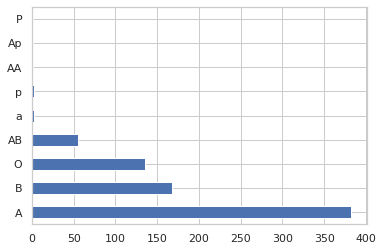

In [36]:
df.blood_type.value_counts().plot(kind="barh")

In [37]:
df['blood_type']=df['blood_type'].replace({"p":"B","Ap":"AB","P":"B","a":"A","AA":"A"})


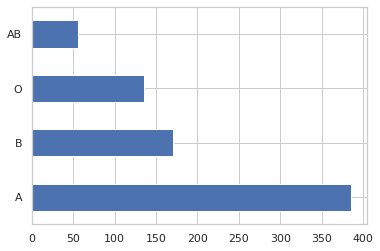

In [38]:
df.blood_type.value_counts().plot(kind="barh")

In [39]:
print("Number of null values in blood_type is: ",df['blood_type'].isnull().sum())
df['blood_type']=df['blood_type'].fillna(df['blood_type'].mode()[0])
print("Number of null values in blood_type is: ",df['blood_type'].isnull().sum())


Number of null values in blood_type is:  21
Number of null values in blood_type is:  0


<h1>Fixing the Outliers in the Numerical columns and fill the null values <b>' if it found '

In [40]:
# using the IQR score to detect outliers :
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

pregnancies      5.000
glucose         41.750
diastolic       18.000
triceps         32.000
insulin        127.500
bmi              9.325
dpf              0.383
age             17.000
dtype: float64


Outliers are points that are:

*   Less than Q1 - 1.5 * IQR
*   Greater then Q3 + 1.5 *IQR

In [41]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
count,768.000000,766.000000,766.000000,767.000000,767.000000,768.000000,767.000000,766.000000
mean,3.845052,120.515627,69.090078,20.521512,79.903520,33.259505,0.472017,33.262402
std,3.369578,32.798743,19.377056,15.957245,115.283105,25.134386,0.331522,11.768033
min,0.000000,0.000000,0.000000,0.000000,0.000000,-35.900000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.275000,0.243500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000
75%,6.000000,140.750000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,476.000000,2.420000,81.000000


In [42]:
## pregnancies :

print("number of null values in pregnancies column is: ",df['pregnancies'].isnull().sum()) # no null values in pregnancies column .

# detect outliers:
mask_pregnancies = (
    (df['pregnancies'] < (Q1['pregnancies'] - 1.5 * IQR['pregnancies'])) |
    (df['pregnancies'] > (Q3['pregnancies'] + 1.5 * IQR['pregnancies']))
     )

mask_pregnancies.sum()


number of null values in pregnancies column is:  0


4

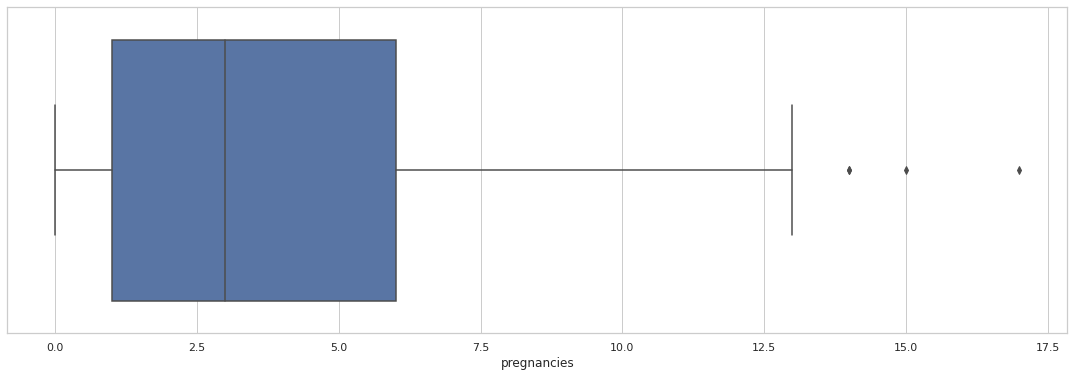

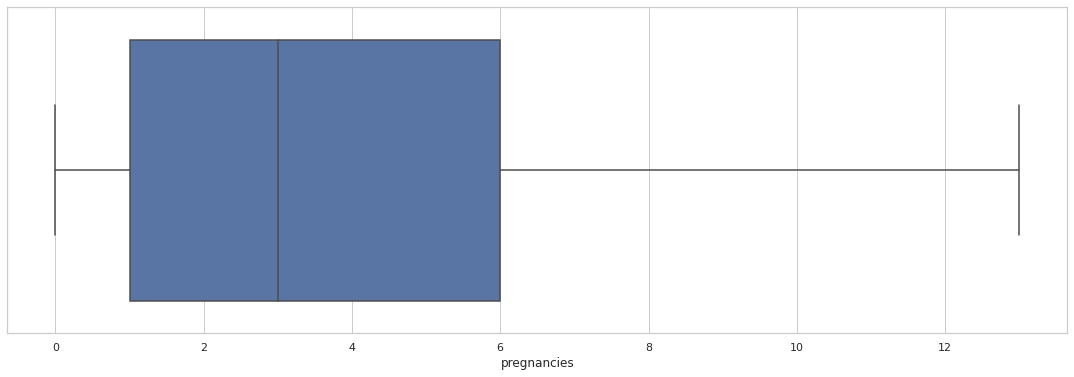

In [43]:
# Replacing Outliers in the pregnancies column with Median Values

plt.figure(figsize=(19, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["pregnancies"])

df.loc[mask_pregnancies,'pregnancies'] = df["pregnancies"].median()

plt.figure(figsize=(19, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["pregnancies"])

In [44]:
## glucose :

print("number of null values in glucose column is: ",df['glucose'].isnull().sum())

df['glucose']=df['glucose'].fillna(df['glucose'].median())

print("number of null values in glucose column is: ",df['glucose'].isnull().sum())

# detect outliers:
mask_glucose = (
    (df['glucose'] < (Q1['glucose'] - 1.5 * IQR['glucose'])) |
    (df['glucose'] > (Q3['glucose'] + 1.5 * IQR['glucose']))
     )

mask_glucose.sum()


number of null values in glucose column is:  2
number of null values in glucose column is:  0


8

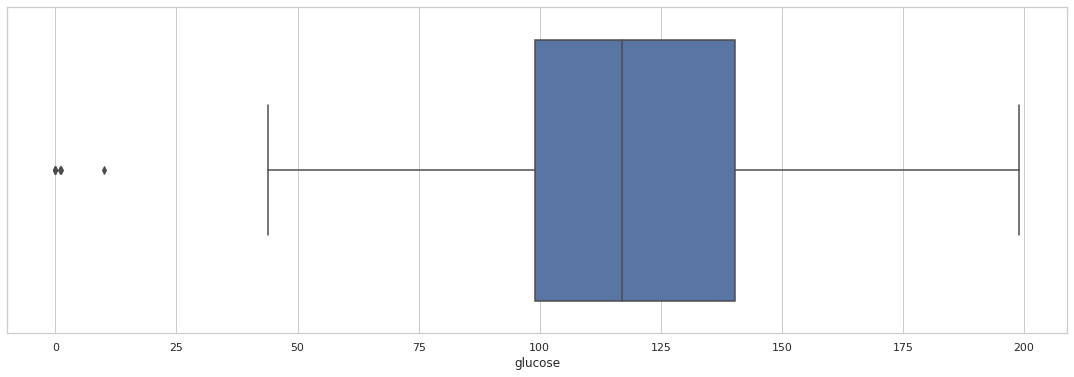

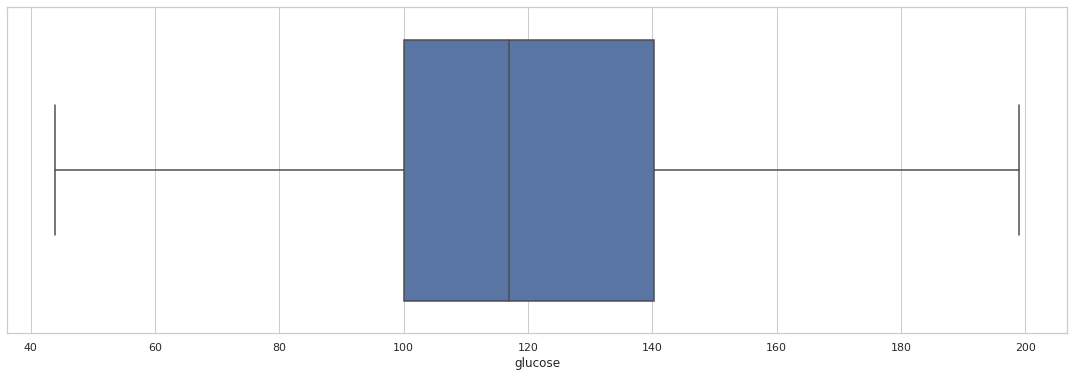

In [45]:
# Replacing Outliers in the glucose column with Median Values

plt.figure(figsize=(19, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["glucose"])

df.loc[mask_glucose,'glucose'] = df["glucose"].median()

plt.figure(figsize=(19, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["glucose"])

In [46]:
## diastolic :

print("number of null values in diastolic column is: ",df['diastolic'].isnull().sum())

df['diastolic']=df['diastolic'].fillna(df['diastolic'].median())

print("number of null values in diastolic column is: ",df['diastolic'].isnull().sum())

# detect outliers:
mask_diastolic = (
    (df['diastolic'] < (Q1['diastolic'] - 1.5 * IQR['diastolic'])) |
    (df['diastolic'] > (Q3['diastolic'] + 1.5 * IQR['diastolic']))
     )

mask_diastolic.sum()


number of null values in diastolic column is:  2
number of null values in diastolic column is:  0


45

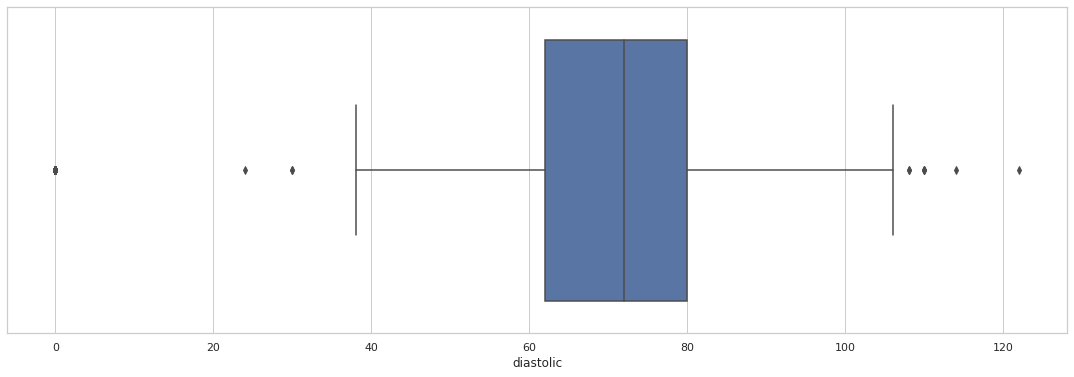

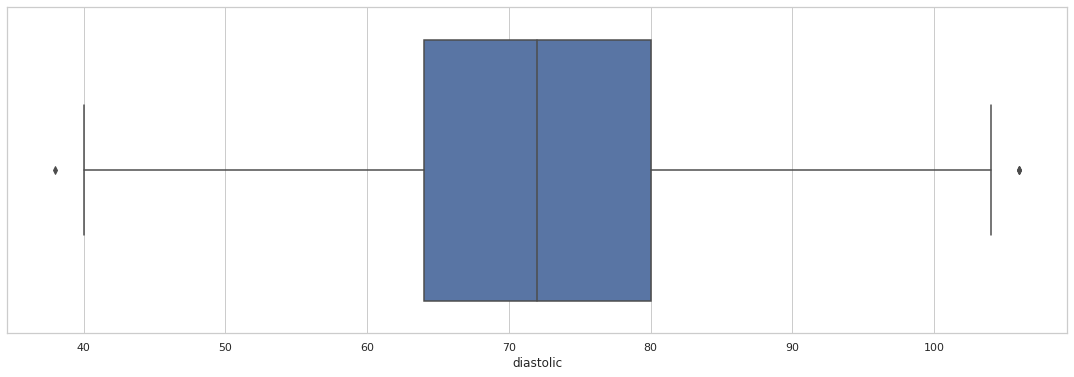

In [47]:
# Replacing Outliers in the diastolic column with Median Values

plt.figure(figsize=(19, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["diastolic"])

df.loc[mask_diastolic,'diastolic'] = df["diastolic"].median()

plt.figure(figsize=(19, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["diastolic"])

In [49]:
## triceps :

print("number of null values in triceps column is: ",df['triceps'].isnull().sum())

df['triceps']=df['triceps'].fillna(df['triceps'].median())

print("number of null values in triceps column is: ",df['triceps'].isnull().sum())

# detect outliers:
mask_triceps = (
    (df['triceps'] < (Q1['triceps'] - 1.5 * IQR['triceps'])) |
    (df['triceps'] > (Q3['triceps'] + 1.5 * IQR['triceps']))
     )

mask_triceps.sum()


number of null values in triceps column is:  0
number of null values in triceps column is:  0


1

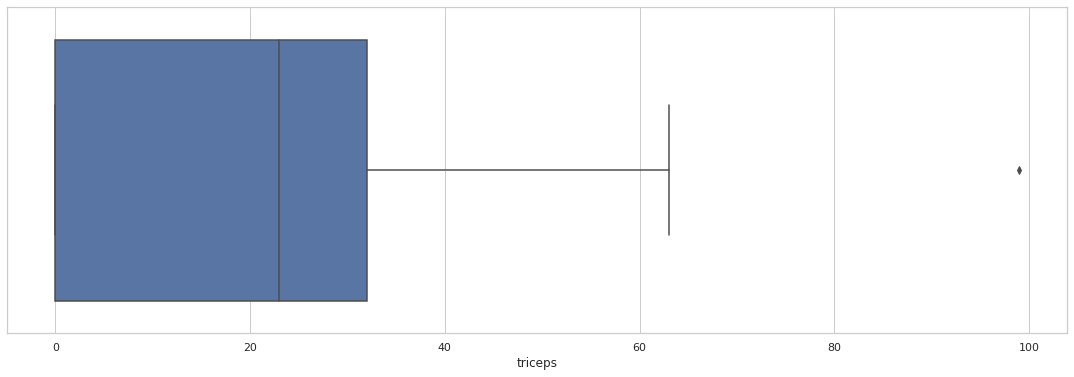

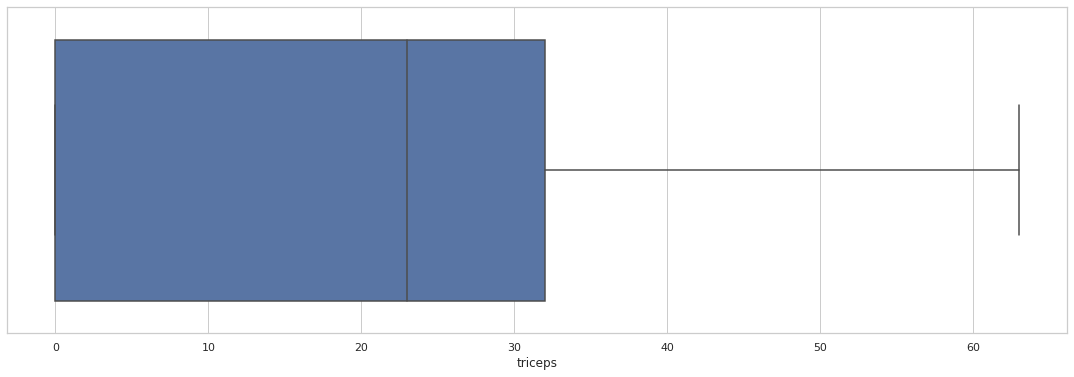

In [50]:
# Replacing Outliers in the triceps column with Median Values

plt.figure(figsize=(19, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["triceps"])

df.loc[mask_triceps,'triceps'] = df["triceps"].median()

plt.figure(figsize=(19, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["triceps"])

In [51]:
## insulin :

print("number of null values in insulin column is: ",df['insulin'].isnull().sum())

df['insulin']=df['insulin'].fillna(df['insulin'].median())

print("number of null values in insulin column is: ",df['insulin'].isnull().sum())

# detect outliers:
mask_insulin = (
    (df['insulin'] < (Q1['insulin'] - 1.5 * IQR['insulin'])) |
    (df['insulin'] > (Q3['insulin'] + 1.5 * IQR['insulin']))
     )

mask_insulin.sum()

number of null values in insulin column is:  1
number of null values in insulin column is:  0


34

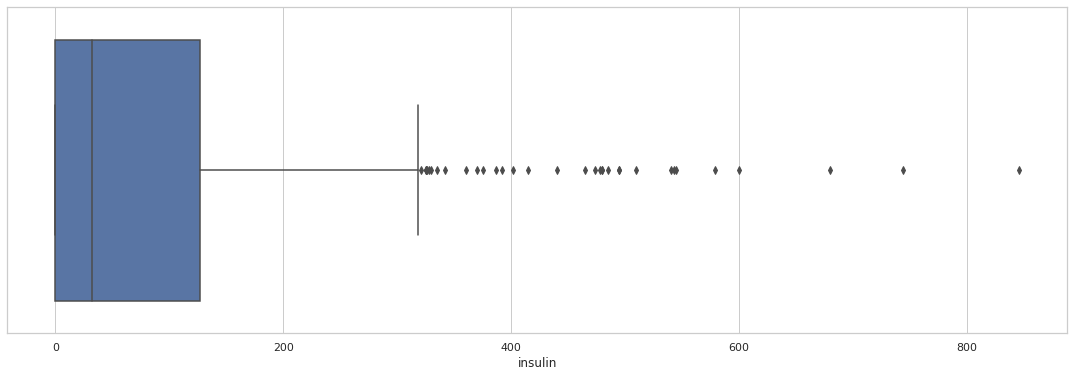

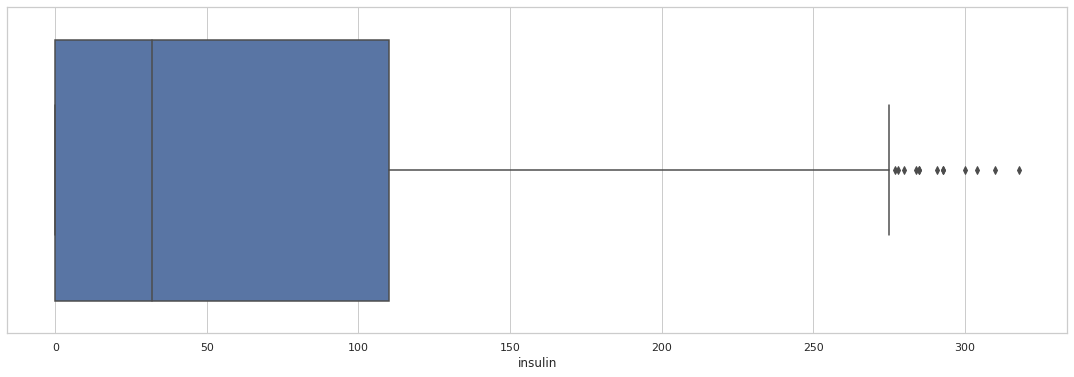

In [52]:
# Replacing Outliers in the insulin column with Median Values

plt.figure(figsize=(19, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["insulin"])

df.loc[mask_insulin,'insulin'] = df["insulin"].median()

plt.figure(figsize=(19, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["insulin"])

In [53]:
## bmi :

print("number of null values in bmi column is: ",df['bmi'].isnull().sum()) # no null value in bmi column

# detect outliers:
mask_bmi = (
    (df['bmi'] < (Q1['bmi'] - 1.5 * IQR['bmi'])) |
    (df['bmi'] > (Q3['bmi'] + 1.5 * IQR['bmi']))
     )

mask_bmi.sum()

number of null values in bmi column is:  0


25

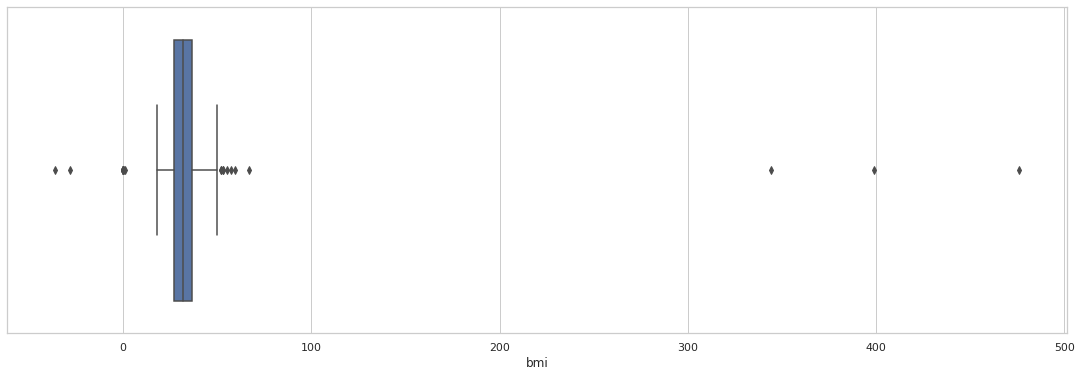

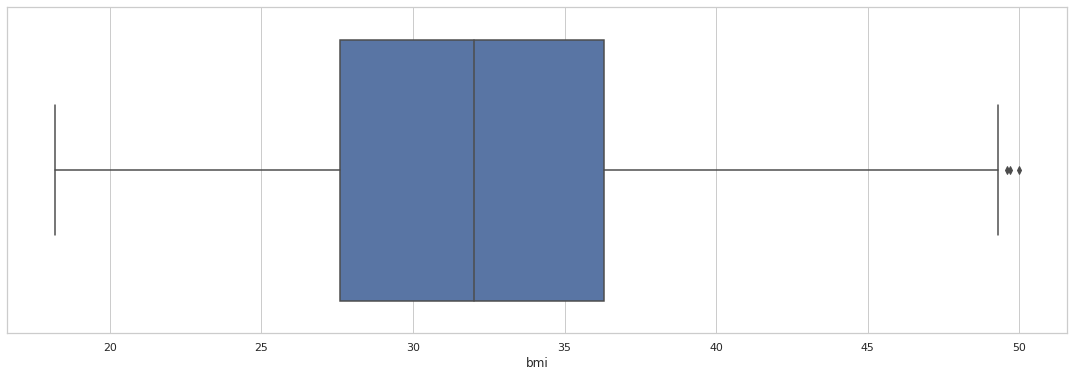

In [54]:
# Replacing Outliers in the bmi column with Median Values

plt.figure(figsize=(19, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["bmi"])

df.loc[mask_bmi,'bmi'] = df["bmi"].median()

plt.figure(figsize=(19, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["bmi"])

In [55]:
## dpf :

print("number of null values in dpf column is: ",df['dpf'].isnull().sum())

df['dpf']=df['dpf'].fillna(df['dpf'].median())

print("number of null values in dpf column is: ",df['dpf'].isnull().sum())

# detect outliers:
mask_dpf = (
    (df['dpf'] < (Q1['dpf'] - 1.5 * IQR['dpf'])) |
    (df['dpf'] > (Q3['dpf'] + 1.5 * IQR['dpf']))
     )

mask_dpf.sum()

number of null values in dpf column is:  1
number of null values in dpf column is:  0


29

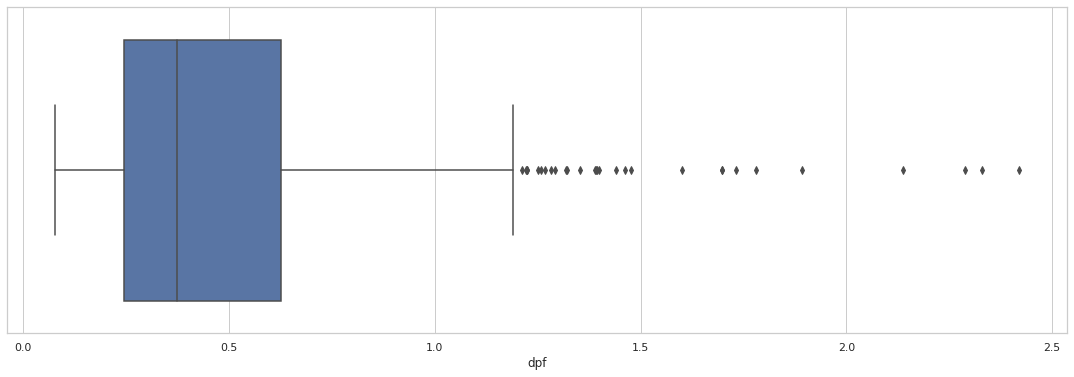

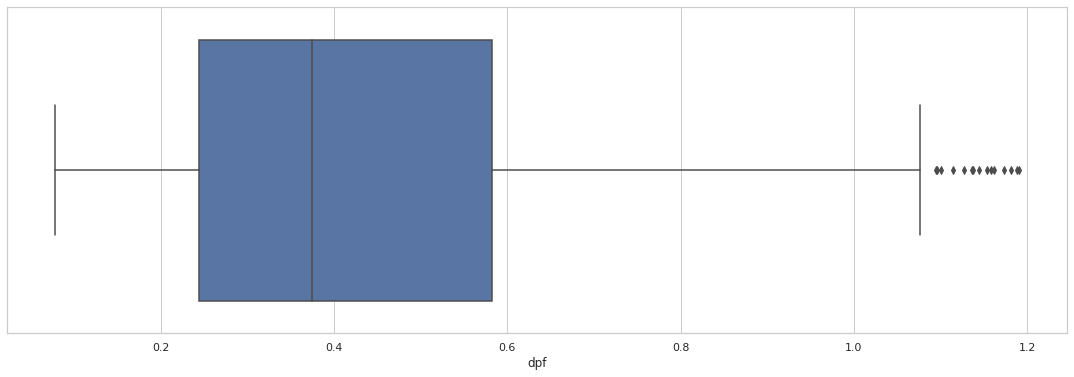

In [56]:
# Replacing Outliers in the dpf column with Median Values

plt.figure(figsize=(19, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["dpf"])

df.loc[mask_dpf,'dpf'] = df["dpf"].median()

plt.figure(figsize=(19, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["dpf"])

In [57]:
## age :

print("number of null values in age column is: ",df['age'].isnull().sum())

df['age']=df['age'].fillna(df['age'].median())

print("number of null values in age column is: ",df['age'].isnull().sum())


number of null values in age column is:  2
number of null values in age column is:  0


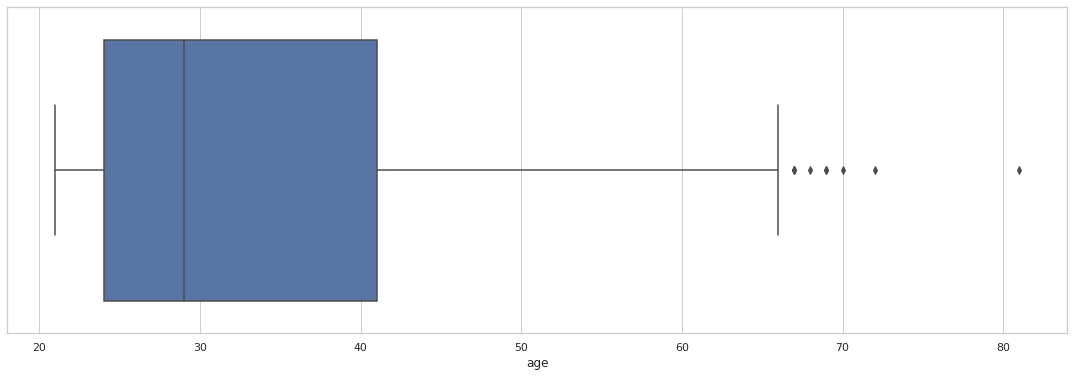

In [58]:
plt.figure(figsize=(19, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["age"])

<h1>do <b>'Binning'</b> for age column<h1>
Binning is the process of transforming numerical variables into categorical counterparts

In [59]:
label = ['Young Man', 'Man','Old Man']

df['Age_labels'] = pd.qcut(df['age'], q=[0,0.30,0.60,1], labels=label)

In [60]:
df[['age','Age_labels']].head(10)

,age,Age_labels
0,50.0,Old Man
1,31.0,Man
2,32.0,Man
3,21.0,Young Man
4,33.0,Man
5,30.0,Man
6,26.0,Man
7,29.0,Man
8,53.0,Old Man
9,54.0,Old Man


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   gender       768 non-null    object  
 1   blood_type   768 non-null    object  
 2   pregnancies  768 non-null    int64   
 3   glucose      768 non-null    float64 
 4   diastolic    768 non-null    float64 
 5   triceps      768 non-null    float64 
 6   insulin      768 non-null    float64 
 7   bmi          768 non-null    float64 
 8   dpf          768 non-null    float64 
 9   age          768 non-null    float64 
 10  Age_labels   768 non-null    category
dtypes: category(1), float64(7), int64(1), object(2)
memory usage: 61.0+ KB
